# Data Inspection and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Assigment 1...")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Assigment 1.../diabetes_prediction_dataset_2 (1).csv")

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0


In [ ]:
data.shape

(65638, 9)

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,65638.000000,65638.000000,65638.000000,65638.000000,65638.000000,65638.000000,65638.000000
mean,46.850975,0.099561,0.049270,28.478539,5.594814,140.885478,0.129498
std,19.580220,0.299416,0.216433,6.541776,1.113641,43.434155,0.335753
min,0.160000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,31.000000,0.000000,0.000000,24.680000,4.800000,100.000000,0.000000
50%,47.000000,0.000000,0.000000,27.320000,5.800000,145.000000,0.000000
75%,62.000000,0.000000,0.000000,31.150000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,91.820000,9.000000,300.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65638 entries, 0 to 65637
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               65638 non-null  object 
 1   age                  65638 non-null  float64
 2   hypertension         65638 non-null  int64  
 3   heart_disease        65638 non-null  int64  
 4   smoking_history      65638 non-null  object 
 5   bmi                  65638 non-null  float64
 6   HbA1c_level          65638 non-null  float64
 7   blood_glucose_level  65638 non-null  int64  
 8   diabetes             65638 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.5+ MB


**Change the Data Type**

Making data types integer

In [ ]:
pd.unique(data.smoking_history)

array(['never', 'current', 'former', 'ever', 'not current', 'No Info'],
      dtype=object)

In [ ]:
pd.unique(data.gender)

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
def change_string_to_int(column):
    variables=pd.unique(data[column])
    for item in range(variables.size):
        data[column]=[item if each==variables[item] else each for each in data[column]]
    return data[column]

In [ ]:
data["gender"]=change_string_to_int("gender")

In [ ]:
data["smoking_history"]=change_string_to_int("smoking_history")

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,1,28.0,0,0,0,27.32,5.7,158,0
2,0,36.0,0,0,1,23.45,5.0,155,0
3,1,76.0,1,1,1,20.14,4.8,155,0
4,0,20.0,0,0,0,27.32,6.6,85,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65638 entries, 0 to 65637
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               65638 non-null  int64  
 1   age                  65638 non-null  float64
 2   hypertension         65638 non-null  int64  
 3   heart_disease        65638 non-null  int64  
 4   smoking_history      65638 non-null  int64  
 5   bmi                  65638 non-null  float64
 6   HbA1c_level          65638 non-null  float64
 7   blood_glucose_level  65638 non-null  int64  
 8   diabetes             65638 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 4.5 MB


Removing from the Data

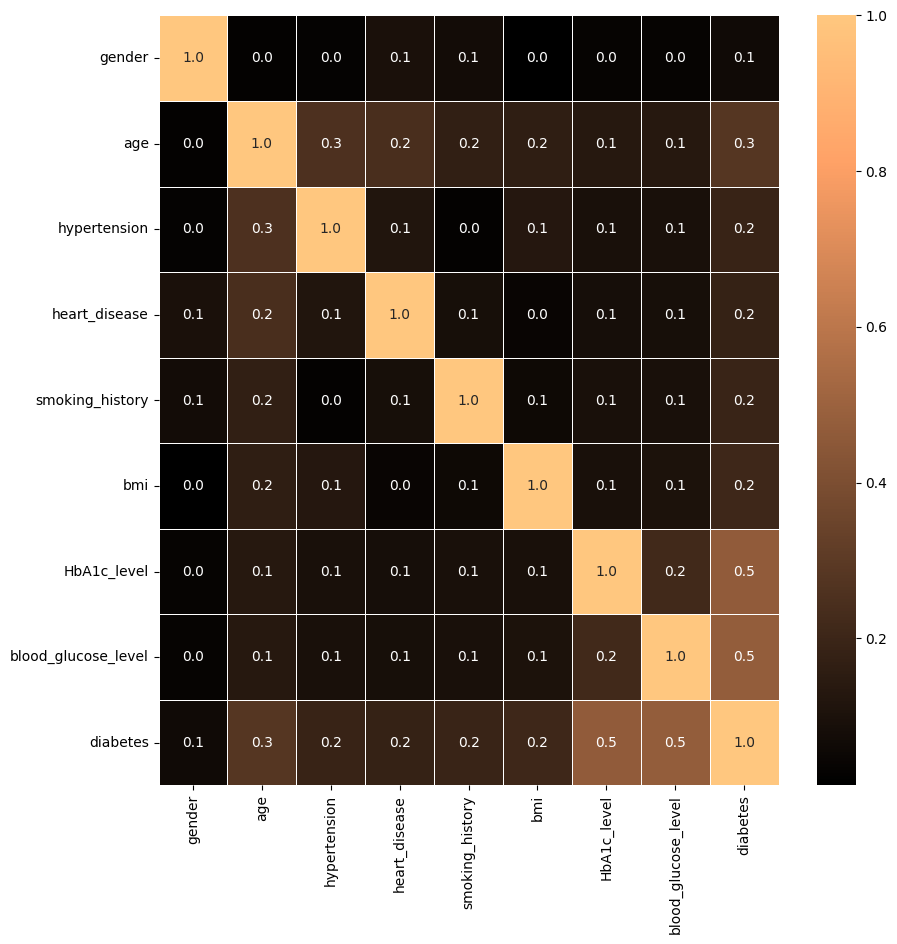

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap = 'copper')
plt.show()

In [ ]:
data.drop("gender",axis=1,inplace=True)

In [ ]:
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,0,25.19,6.6,140,0
1,28.0,0,0,0,27.32,5.7,158,0
2,36.0,0,0,1,23.45,5.0,155,0
3,76.0,1,1,1,20.14,4.8,155,0
4,20.0,0,0,0,27.32,6.6,85,0



**why drop "gender"column ?**


---



   Gender is categorical variable that might not strongly correlate with the target variables or contribute substantially to the model's performance compared to other variables like age, hypertension, heart disease, etc. Also gender column is a column that shows no and relationship with other variables.it is understood by the strong negative correlations shown in dark colors in heatmap created here. Accordingly, except gender column, all other variables were used for this process.




---



**Split and Train**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x = data.drop("diabetes",axis=1)
y = data.diabetes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##  Results Presentation

**Decision Tree Classification Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = DTC.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
a=accuracy_score(y_test, y_pred)
print(a)

[[16476   626]
 [  566  2024]]
0.9394678041844404


True Negative: 16476
False Negative: 566
False pasitive: 626
True positive: 2024


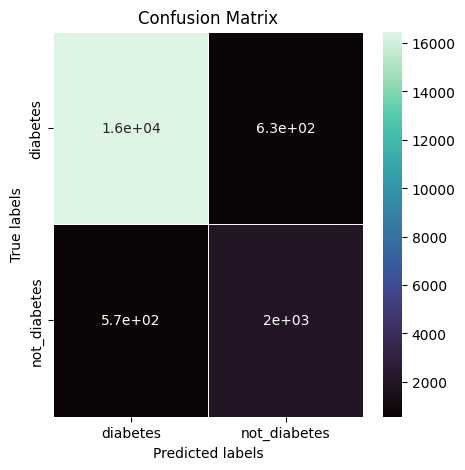

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True , linewidth=0.5,cmap = "mako")
print('True Negative:',cm[0,0])
print('False Negative:',cm[1,0])
print('False pasitive:',cm[0,1])
print('True positive:',cm[1,1])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.gca().set_xticklabels(['diabetes', 'not_diabetes'])
plt.gca().set_yticklabels(['diabetes', 'not_diabetes'])

plt.show()

**Random Forest Classification Algorithm**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
RFC.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [ ]:
y_pred1 = RFC.predict(x_test)

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
b=accuracy_score(y_test, y_pred1)
print(b)

[[16985   117]
 [  677  1913]]
0.9596790574852732


True Negative: 16985
False Negative: 677
False pasitive: 117
True positive: 1913


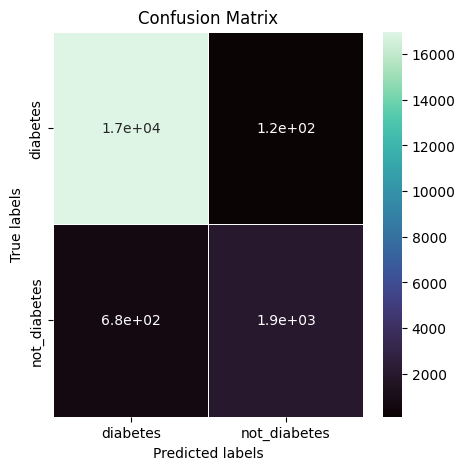

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm1,annot=True , linewidth=0.5,cmap = "mako")
print('True Negative:',cm1[0,0])
print('False Negative:',cm1[1,0])
print('False pasitive:',cm1[0,1])
print('True positive:',cm1[1,1])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.gca().set_xticklabels(['diabetes', 'not_diabetes'])
plt.gca().set_yticklabels(['diabetes', 'not_diabetes'])

plt.show()

**logistic Classification Algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred2 = LR.predict(x_test)

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
c=accuracy_score(y_test, y_pred2)
print(c)

[[16815   287]
 [  887  1703]]
0.9403818809668901


True Negative: 16815
False Negative: 887
False pasitive: 287
True positive: 1703


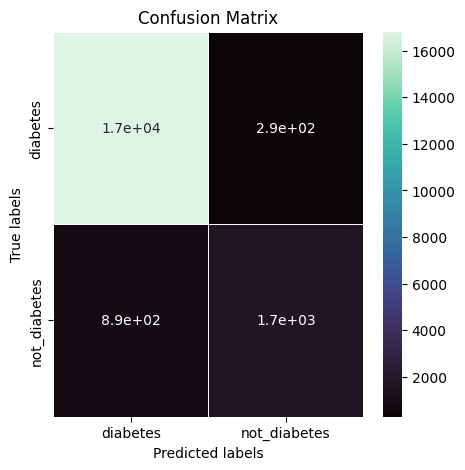

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm2,annot=True , linewidth=0.5,cmap = "mako")
print('True Negative:',cm2[0,0])
print('False Negative:',cm2[1,0])
print('False pasitive:',cm2[0,1])
print('True positive:',cm2[1,1])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.gca().set_xticklabels(['diabetes', 'not_diabetes'])
plt.gca().set_yticklabels(['diabetes', 'not_diabetes'])

plt.show()

## Performance Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(x_train, y_train)

RFC_model = RandomForestClassifier()
RFC_model.fit(x_train, y_train)

LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
print("\nDecision Tree:")
DTC_accuracy, DTC_precision, DTC_recall, DTC_f1 = evaluate_model(DTC_model, x_test, y_test)
print(f"Accuracy: {DTC_accuracy:.3f}, Precision: {DTC_precision:.2f}, Recall: {DTC_recall:.2f}, F1-score: {DTC_f1:.2f}")

print("\nRandom Forest:")
RFC_accuracy, RFC_precision, RFC_recall, RFC_f1 = evaluate_model(RFC_model, x_test, y_test)
print(f"Accuracy: {RFC_accuracy:.3f}, Precision: {RFC_precision:.2f}, Recall: {RFC_recall:.2f}, F1-score: {RFC_f1:.2f}")

print("Logistic Regression:")
LR_accuracy, LR_precision, LR_recall, LR_f1 = evaluate_model(LR_model, x_test, y_test)
print(f"Accuracy: {LR_accuracy:.3f}, Precision: {LR_precision:.2f}, Recall: {LR_recall:.2f}, F1-score: {LR_f1:.2f}")





Decision Tree:
Accuracy: 0.940, Precision: 0.76, Recall: 0.79, F1-score: 0.78

Random Forest:
Accuracy: 0.960, Precision: 0.94, Recall: 0.74, F1-score: 0.83
Logistic Regression:
Accuracy: 0.940, Precision: 0.86, Recall: 0.66, F1-score: 0.74


Get ROC Curve for the more understanding

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
DTC_probs = DTC_model.predict_proba(x_test)[:, 1]
RFC_probs = RFC_model.predict_proba(x_test)[:, 1]
LR_probs = LR_model.predict_proba(x_test)[:, 1]

In [ ]:
DTC_fpr, DTC_tpr, _ = roc_curve(y_test, DTC_probs)
DTC_auc = roc_auc_score(y_test, DTC_probs)

RFC_fpr, RFC_tpr, _ = roc_curve(y_test, RFC_probs)
RFC_auc = roc_auc_score(y_test, RFC_probs)

LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
LR_auc = roc_auc_score(y_test, LR_probs)

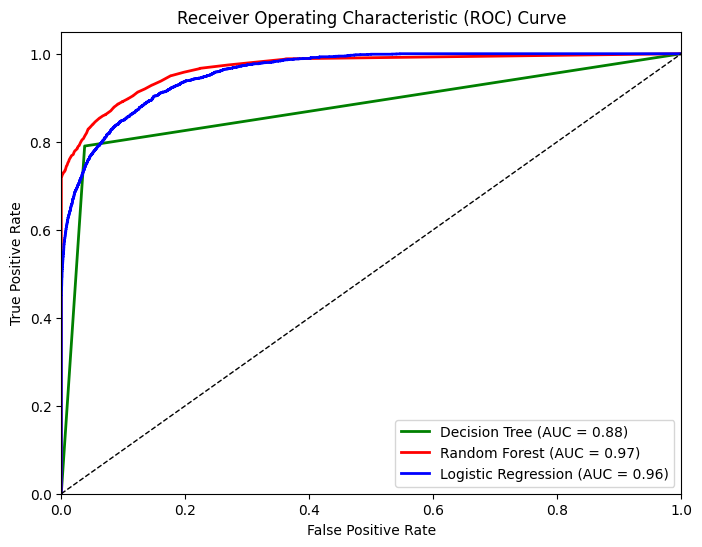

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(DTC_fpr, DTC_tpr, color='green', lw=2, label=f'Decision Tree (AUC = {DTC_auc:.2f})')
plt.plot(RFC_fpr, RFC_tpr, color='red', lw=2, label=f'Random Forest (AUC = {RFC_auc:.2f})')
plt.plot(LR_fpr, LR_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {LR_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

7. Suitability of Algorithms

---
The Random Forest classification algorithm is a most suitable algorithm for this problem. Final evaluation result show with accuracy of 0.959 and an F1-score of 0.83. These values show a higher value than the other both Decision Tree and Logistic Regression algorithms. Random Forest effectively reduces overfitting, as demonstrated by its high true positive rate in 1913 and low false positive rate 117 in the confusion matrix. Also, the suitability of this algorithm is further shown by the ROC Curve shown for understanding. All these results show the suitability of this algorithm over other algorithms. This indicates its ability to accurately classify diabetes. Therefore, Random Forest gives best predictive for the classification task compared to the other algorithms.





---



 8.Challenges and Solutions

---

Data processing

•	Challenge: Data processing contained large amounts of data that could
  not be used directly for the classification process.

•	Solution: The relevant variables were used for the classification       process by normalizing the dropping columns and converting them to numerical values.

Choosing algorithm

•	Challenge: most suitable machine algorithm

•	Solution: difficult task and by repeatedly experimenting with different
  algorithms and evaluating its performance, the appropriate algorithm was selected.

Performance Evaluation

•	Challenge: Choosing appropriate evaluation metrics and interpreting the
  results.

•	Solution: Select evaluation metrics relevant to the specific problem,
  such as accuracy, precision, recall, F1-score, or ROC-AUC. Interpret the results in the context of the problem domain and consider trade-offs between different metrics.

memory management

•	Challenge: A dataset with more than sixty-five rows of data was a
  challenge. colab has a memory limitation and had problems with memory
  management.so there was a slight decline in performance on the fact processing task.

•	Solution: reduce the memory usage

Errors occurre
  
•	Challenge: runtime errors, syntax errors.

•	Solution: Carefully read any error messages or stack traces provided by
  Colab. They often contain valuable information about the cause of the issue.





---

